In [51]:
import JupyterNotebooksLib as slicernb

# Set image viewer size to 50% (fill half of a cell)
slicernb.AppWindow.setWindowSize(scale=0.5)
# Hide patient information from slice view
slicernb.showSliceViewAnnotations(False)

In [52]:
# Clear scene
slicer.mrmlScene.Clear(False)

# Load a Slicer sample data set
import SampleData
volume = SampleData.SampleDataLogic().downloadMRBrainTumor1()

print("Volume size: {0}".format(volume.GetImageData().GetDimensions()))

Volume size: (256, 256, 112)


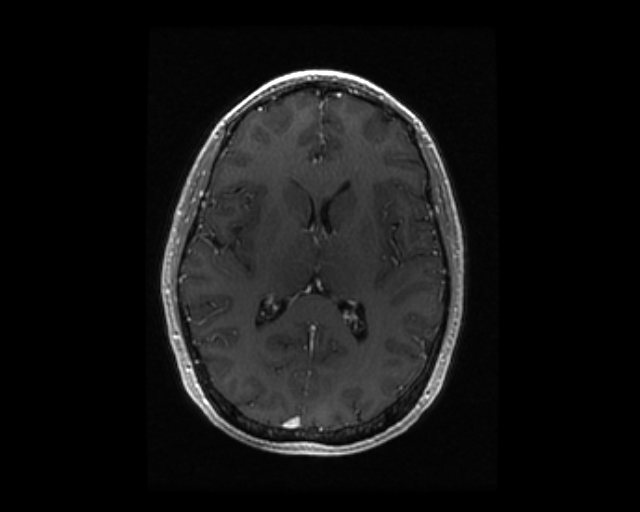

In [53]:
# Show slice view
slicernb.ViewDisplay("OneUpRedSlice")

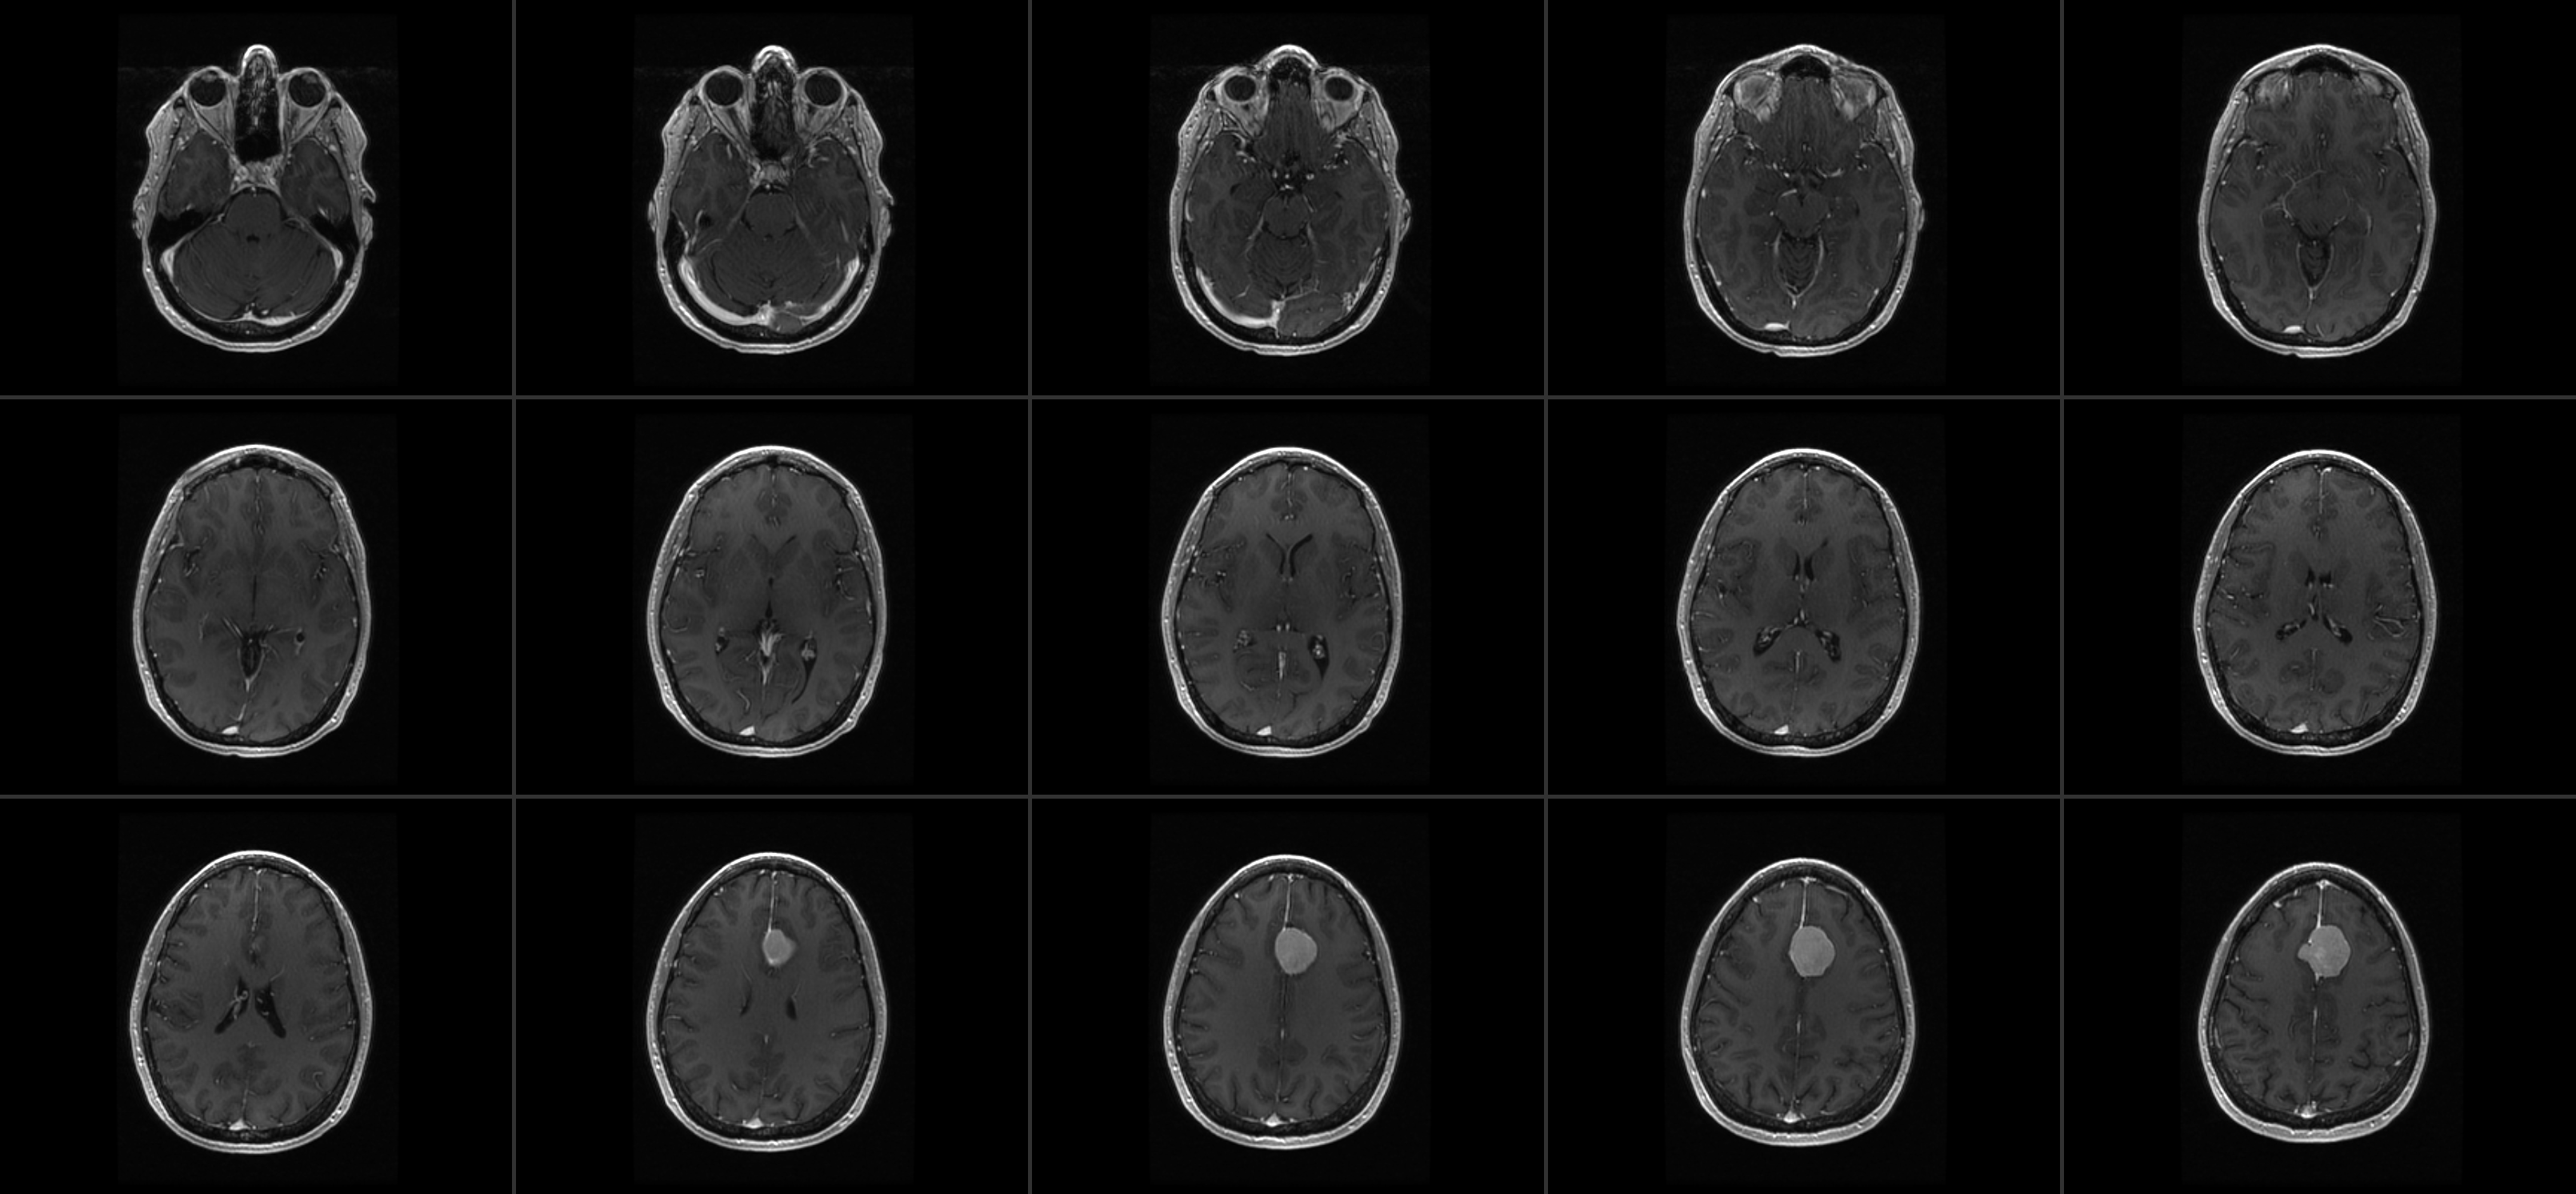

In [54]:
# Lightbox view
slicernb.ViewLightboxDisplay("Red", columns=5, rows=3, rangeShrink=[45,50])

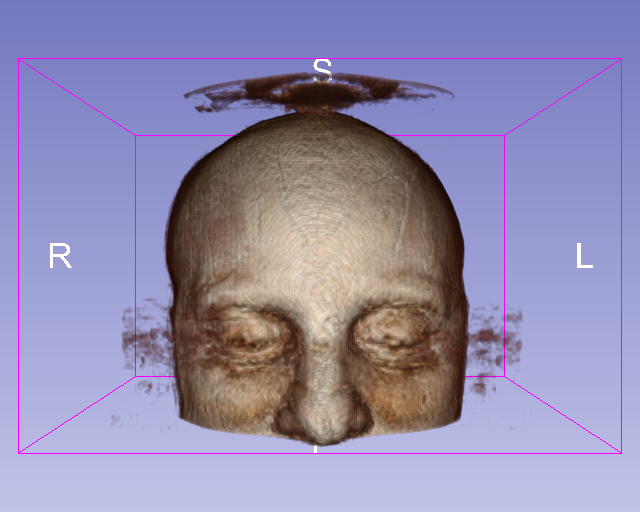

In [55]:
# Enable 3D volume rendering
slicernb.showVolumeRendering(volume)

# Show slice and 3D views
slicernb.ViewDisplay("OneUp3D")  # You can also try: FourUp, OneUpRedSlice, OneUp3D

In [56]:
# Slice view display
from ipywidgets import interact
@interact(position=(0,100))
def update(position=50):
    return slicernb.ViewSliceDisplay('Red', positionPercent=position)

interactive(children=(IntSlider(value=50, description='position'), Output()), _dom_classes=('widget-interact',…

In [57]:

# Enable volume cropping
displayNode = slicer.modules.volumerendering.logic().GetFirstVolumeRenderingDisplayNode(volume)
displayNode.SetCroppingEnabled(True)
roiNode = displayNode.GetROINode()

# 3D view display
slicernb.reset3DView()
from ipywidgets import interact
@interact(roll=(-90.0,90.0,5), pitch=(-90.0,90.0,5), yaw=(-180.0,180.0,5), cropx=(0,70,5), cropy=(0,120,5), cropz=(0, 80, 5))
def update(roll=0, pitch=0, yaw=0, cropx=70, cropy=120, cropz=80):
    roiNode.SetRadiusXYZ([cropx, cropy, cropz])
    return slicernb.View3DDisplay(0, orientation=[roll, pitch, yaw])

interactive(children=(FloatSlider(value=0.0, description='roll', max=90.0, min=-90.0, step=5.0), FloatSlider(v…

In [8]:
from ipywidgets import HBox
display(HBox([slicernb.ViewSliceWidget('Red'), slicernb.ViewSliceWidget('Yellow'), slicernb.ViewSliceWidget('Green')]))

In [9]:
display(HBox([slicernb.ViewSliceBaseWidget('Red', width="40%"), slicernb.View3DWidget(0, width="40%")]))

In [10]:

# Adjust maximum rate of Slicer's Jupyter kernel consuming Jupyter messages.
# Lower values make the notebook more responsive but too low values may make the Slicer application
# slow to respond.
slicer.modules.jupyterkernel.setPollIntervalSec(0.001)

# 3D view
slicernb.AppWindow.setWindowSize(scale=0.5)
live3d = slicernb.ViewInteractiveWidget('1')
live3d.trackMouseMove = True
display(live3d)

ViewInteractiveWidget(height=439, width=174)

In [11]:

# Slice view (use arrow keys to move between slices, right-click-and-drag to zoom in/out)
liveRedSlice = slicernb.ViewInteractiveWidget('R')
liveRedSlice.trackMouseMove = True
display(liveRedSlice)

ViewInteractiveWidget(height=926, width=1454)

In [12]:
slicernb.showVolumeRendering(volume, show=True)

app = slicernb.AppWindow()
# "404 : Not Found" error is displayed if Jupyter desktop server is not configured
app

In [13]:

# Show full application GUI
app.setContents("full")
slicer.util.selectModule("VolumeRendering")

In [14]:

import numpy as np
markupPoints = np.array([
    [ 69.12484176,  -8.73226641,  -2.175     ],
    [ 56.3258959 ,  32.61817407,  -2.175     ],
    [ 46.15237483,  57.88788769,  -2.175     ],
    [ 34.02739799,  74.35843751,  -2.175     ],
    [  3.93193405,  85.64423649,  -2.175     ],
    [-45.51061385,  62.53521954,  -2.175     ],
    [-61.63318381, -10.01634531,  -2.175     ],
    [-51.97287678, -54.02084408,  -2.175     ],
    [-18.1022449 , -87.94210015,  -2.175     ],
    [ 32.95255999, -83.64274816,  -2.175     ],
    [ 58.6231426 , -59.59987177,  -2.175     ],
    [ 67.88479492, -35.27503826,  -2.175     ]])

closedCurve = slicer.mrmlScene.AddNewNodeByClass("vtkMRMLMarkupsClosedCurveNode")
slicer.util.updateMarkupsControlPointsFromArray(closedCurve, markupPoints)

closedCurve  # slicernb.displayable(obj) is called automatially for cell outputs

label  position.R  ...  visible  description
0    MarkupsClosedCurve-1   69.124842  ...     True             
1    MarkupsClosedCurve-2   56.325896  ...     True             
2    MarkupsClosedCurve-3   46.152375  ...     True             
3    MarkupsClosedCurve-4   34.027398  ...     True             
4    MarkupsClosedCurve-5    3.931934  ...     True             
5    MarkupsClosedCurve-6  -45.510614  ...     True             
6    MarkupsClosedCurve-7  -61.633184  ...     True             
7    MarkupsClosedCurve-8  -51.972877  ...     True             
8    MarkupsClosedCurve-9  -18.102245  ...     True             
9   MarkupsClosedCurve-10   32.952560  ...     True             
10  MarkupsClosedCurve-11   58.623143  ...     True             
11  MarkupsClosedCurve-12   67.884795  ...     True             

[12 rows x 7 columns]

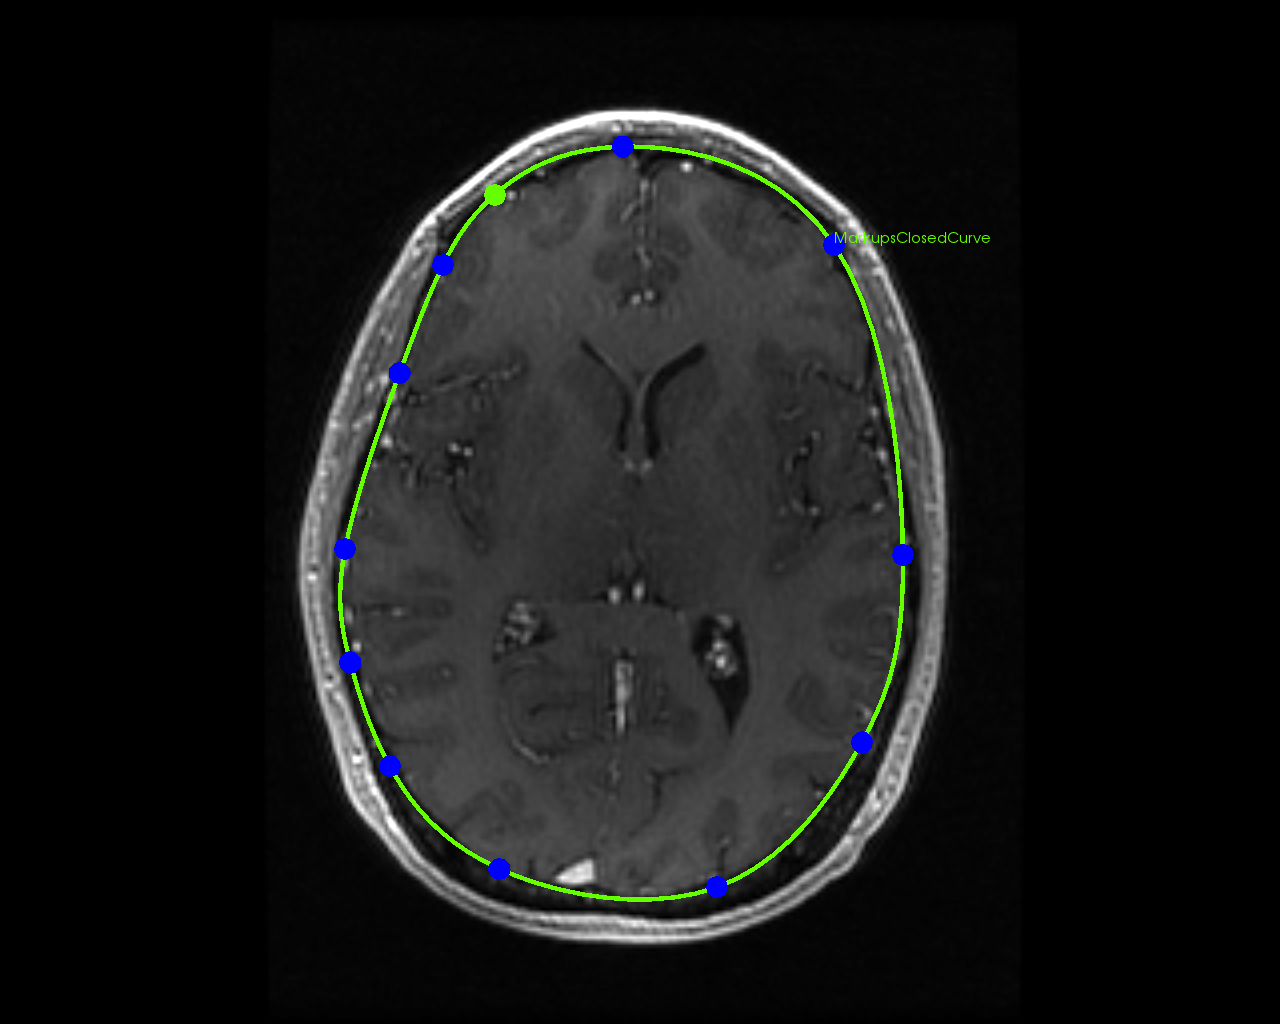

In [15]:

closedCurve.SetNthControlPointSelected(3, False)
closedCurve.GetDisplayNode().SetSelectedColor(0,0,1)
closedCurve.GetDisplayNode().SetGlyphScale(5)
closedCurve.GetDisplayNode().UseGlyphScaleOn()
slicer.util.setSliceViewerLayers(fit=True)
slicer.modules.markups.logic().JumpSlicesToNthPointInMarkup(closedCurve.GetID(), 1)
app.setWindowSize(scale=1.0)
app.setContents("viewers")
slicernb.ViewDisplay('OneUpRedSlice', center=False)

In [16]:
# Interactive view rotation

from ipywidgets import interact
@interact(roll=(-90.0,90.0,5), pitch=(-90.0,90.0,5), yaw=(-90.0,90.0,5))
def update(roll=0, pitch=0, yaw=0):
    return slicernb.ModelDisplay(modelNode, orientation=[roll, pitch, yaw], imageSize=[200,200])

interactive(children=(FloatSlider(value=0.0, description='roll', max=90.0, min=-90.0, step=5.0), FloatSlider(v…

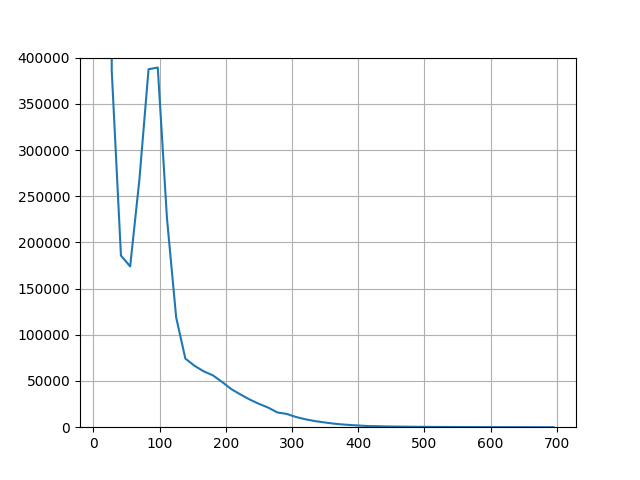

In [17]:

try:
  import matplotlib
except ModuleNotFoundError:
  pip_install('matplotlib')
  import matplotlib

matplotlib.use('Agg')

# Get a volume from SampleData and compute its histogram
import numpy as np
histogram = np.histogram(arrayFromVolume(volume), bins=50)

# Show a plot using matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(histogram[1][1:], histogram[0].astype(float))
ax.grid(True)
ax.set_ylim((0, 4e5))

slicernb.MatplotlibDisplay(plt)

In [18]:
import JupyterNotebooksLib as slicernb

# Set image viewer size to 50% (fill half of a cell)
slicernb.AppWindow.setWindowSize(scale=0.5)
slicernb.AppWindow.setContents("viewers")

In [39]:
# Clear scene
slicer.mrmlScene.Clear(False)

# Load data
import SampleData
volume = slicer.util.loadVolume('C:/Users/sravanthvishnu/OneDrive/Documents/MajorProject/MRBrainTumor1.nrrd')

# Create output node
blurredVolume = slicer.mrmlScene.AddNewNodeByClass("vtkMRMLScalarVolumeNode", "Filtered")
blurredVolume.CreateDefaultDisplayNodes()

# Show 3-over-3 compare layout with original and blurred volume
slicernb.showSliceViewAnnotations(True)
slicernb.setViewLayout("ThreeOverThree")
layoutManager = slicer.app.layoutManager()
for sliceViewName in layoutManager.sliceViewNames():
    sliceWidget = layoutManager.sliceWidget(sliceViewName)
    volumeNodeToShow = volume if sliceWidget.mrmlSliceNode().GetViewGroup() == 0  else blurredVolume
    sliceWidget.mrmlSliceCompositeNode().SetBackgroundVolumeID(volumeNodeToShow.GetID())

# Create a function for performing the filtering.
# This will be executed whenever the slider is moved and released.
def threshold(lower=-20, upper=180):
    parameters = {
        "InputVolume": volume.GetID(),
        "OutputVolume": blurredVolume.GetID(),
        "Lower": lower,
        "Upper": upper
        }
    slicer.cli.runSync(slicer.modules.thresholdscalarvolume, parameters=parameters, update_display=False)
    return slicernb.ViewDisplay("ThreeOverThree")

# Create slider
from ipywidgets import FloatSlider, interact
i=interact(threshold,
         lower=FloatSlider(150, min=-50, max=300, step=5, continuous_update=False),
         upper=FloatSlider(250, min=-50, max=300, step=5, continuous_update=False))

interactive(children=(FloatSlider(value=150.0, continuous_update=False, description='lower', max=300.0, min=-5…

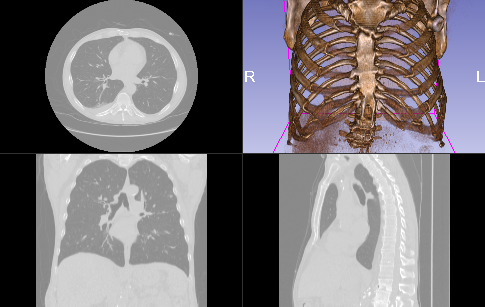

In [40]:

# Clear scene
slicer.mrmlScene.Clear(False)

import SampleData
volume = SampleData.SampleDataLogic().downloadCTChest()

# Volume render a small (30%) image
slicernb.AppWindow.setWindowSize(scale=0.3)
slicernb.showVolumeRendering(volume)
slicernb.showSliceViewAnnotations(False)

display(slicernb.ViewDisplay("FourUp"))

# Disable volume rendering to make sure it does not slow down execution
slicernb.showVolumeRendering(volume, False)

In [41]:
# Print all parameters of a CLI module
cliModule = slicer.modules.grayscalemodelmaker
n=cliModule.cliModuleLogic().CreateNode()
for groupIndex in range(n.GetNumberOfParameterGroups()):
  for parameterIndex in range(n.GetNumberOfParametersInGroup(groupIndex)):
    print('Parameter ({0}/{1}): {2} ({3})'.format(groupIndex, parameterIndex, n.GetParameterName(groupIndex, parameterIndex), n.GetParameterLabel(groupIndex, parameterIndex)))

Parameter (0/0): InputVolume (Input Volume)
Parameter (0/1): OutputGeometry (Output Geometry)
Parameter (1/0): Threshold (Threshold)
Parameter (1/1): Name (Model Name)
Parameter (1/2): Smooth (Smooth)
Parameter (1/3): Decimate (Decimate)
Parameter (1/4): SplitNormals (Split Normals?)
Parameter (1/5): PointNormals (Compute Point Normals?)
Parameter (2/0): Debug (Debug)


Creating mesh from volume...


IntProgress(value=0)

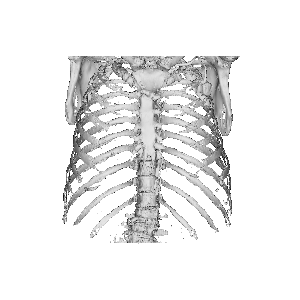

In [42]:
# Interactive CLI module execution (with progress reporting)

parameters = {}
parameters["InputVolume"] = volume.GetID()
parameters["Threshold"] = 220
outModel = slicer.vtkMRMLModelNode()
slicer.mrmlScene.AddNode( outModel )
parameters["OutputGeometry"] = outModel.GetID()
grayMaker = slicer.modules.grayscalemodelmaker
print("Creating mesh from volume...")
slicernb.cliRunSync(grayMaker, None, parameters)

# Model display in custom orientation
slicernb.ModelDisplay(outModel, orientation=[0,-90,0])

In [43]:
# Set CLI module parameters using interactive widget

from ipywidgets import interact_manual
@interact_manual(threshold=(-500.0,1200,5))
def h(threshold=-100):
    parameters["Threshold"] = threshold
    slicernb.cliRunSync(grayMaker, None, parameters)
    return slicernb.ModelDisplay(outModel, orientation=[0,-90,0])

interactive(children=(FloatSlider(value=-100.0, description='threshold', max=1200.0, min=-500.0, step=5.0), Bu…

In [44]:
import JupyterNotebooksLib as slicernb

import SimpleITK as sitk
import sitkUtils as su

# Clear scene
slicer.mrmlScene.Clear(False)

# Load 3D image using SimpleITK
reader = sitk.ImageFileReader()
reader.SetFileName("C:/Users/sravanthvishnu/OneDrive/Documents/MajorProject/MRBrainTumor1.nrrd")
image = reader.Execute()

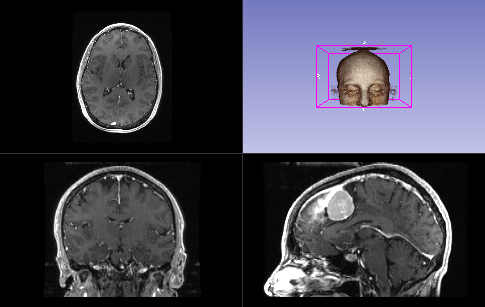

In [45]:
volumeNode = su.PushVolumeToSlicer(image)

# Prevent automatic brightness/contrast update to make the processed images easier to compare
volumeNode.GetDisplayNode().SetAutoWindowLevel(False)

# Set up view layout
slicer.app.layoutManager().setLayout(slicer.vtkMRMLLayoutNode.SlicerLayoutFourUpView)
# Set up slice views
slicer.util.setSliceViewerLayers(background=volumeNode, fit=True)
# Set up volume rendering
displayNode = slicer.modules.volumerendering.logic().CreateDefaultVolumeRenderingNodes(volumeNode)
displayNode.GetVolumePropertyNode().Copy(slicer.modules.volumerendering.logic().GetPresetByName('MR-Default'))
slicer.util.resetThreeDViews()

# Display views
slicernb.ViewDisplay()

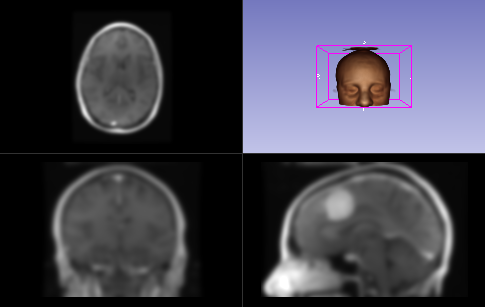

In [46]:
blurFilter = sitk.SmoothingRecursiveGaussianImageFilter()
blurFilter.SetSigma(3.0)
blurredImage = blurFilter.Execute(image)

su.PushVolumeToSlicer(blurredImage, targetNode=volumeNode)
slicernb.ViewDisplay()

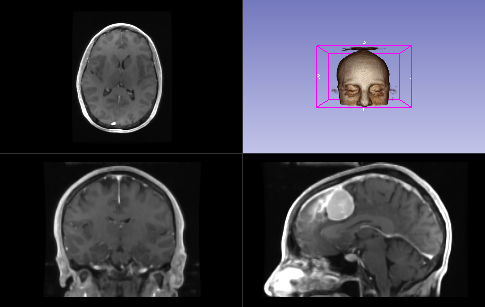

In [47]:
blurFilter2 = sitk.CurvatureFlowImageFilter()
blurFilter2.SetNumberOfIterations(5)
blurFilter2.SetTimeStep(0.15)
blurredImage2 = blurFilter2.Execute(image)

su.PushVolumeToSlicer(blurredImage2, targetNode=volumeNode)
slicernb.ViewDisplay()

In [48]:
import JupyterNotebooksLib as slicernb

# Set image viewer size to 50% (fill half of a cell)
slicernb.AppWindow.setWindowSize(scale=0.5)
# Hide patient information from slice view
slicernb.showSliceViewAnnotations(False)

# Example of installing an extension:
# slicernb.installExtensions(["SegmentEditorExtraEffects"])

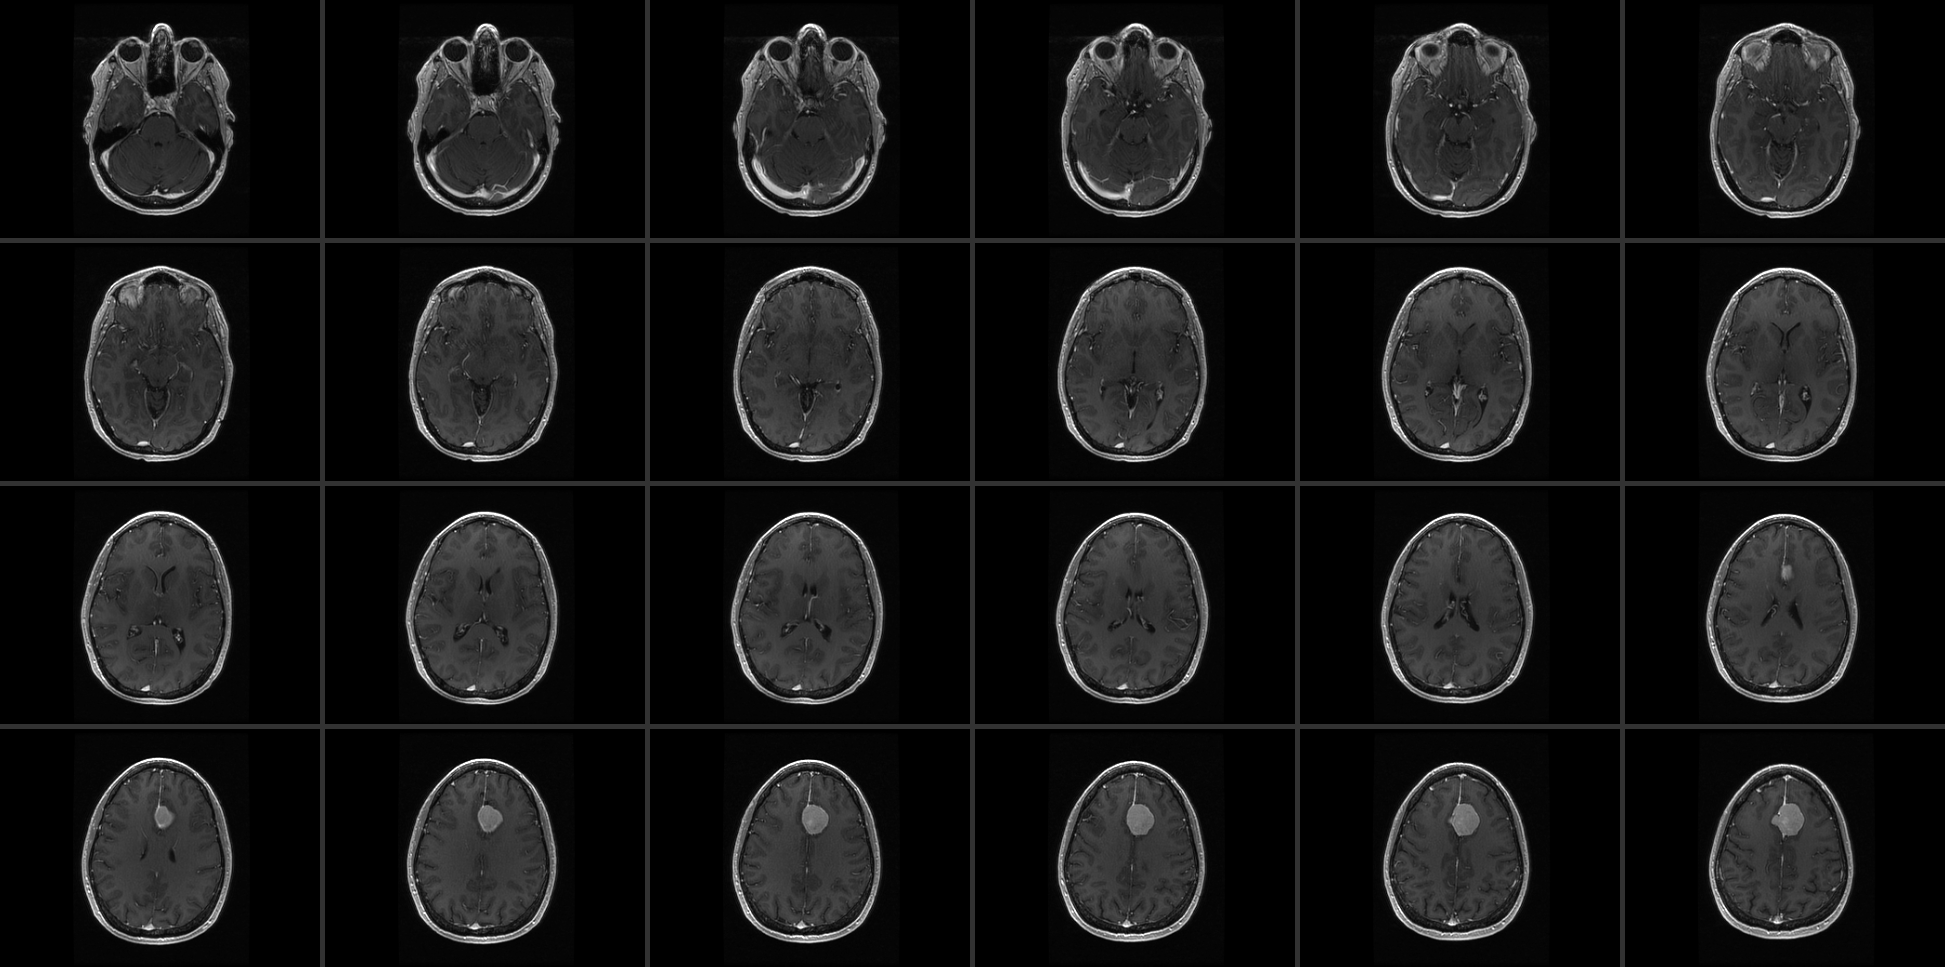

In [49]:
# Clear scene
slicer.mrmlScene.Clear(False)

# Load from local file
volume = slicer.util.loadVolume('C:/Users/sravanthvishnu/OneDrive/Documents/MajorProject/MRBrainTumor1.nrrd')

# Lightbox view
slicernb.ViewLightboxDisplay("Red", rangeShrink=[45,50])

self.extentGrowthRatio = 0.1
masterImageExtent = (0, 255, 0, 255, 0, 111)
labelsEffectiveExtent = (85, 182, 48, 152, 44, 108)
labelsExpandedExtent = [76, 191, 38, 162, 38, 111]
Grow-cut operation on volume of 116x125x74 voxels was completed in 1.1 seconds.


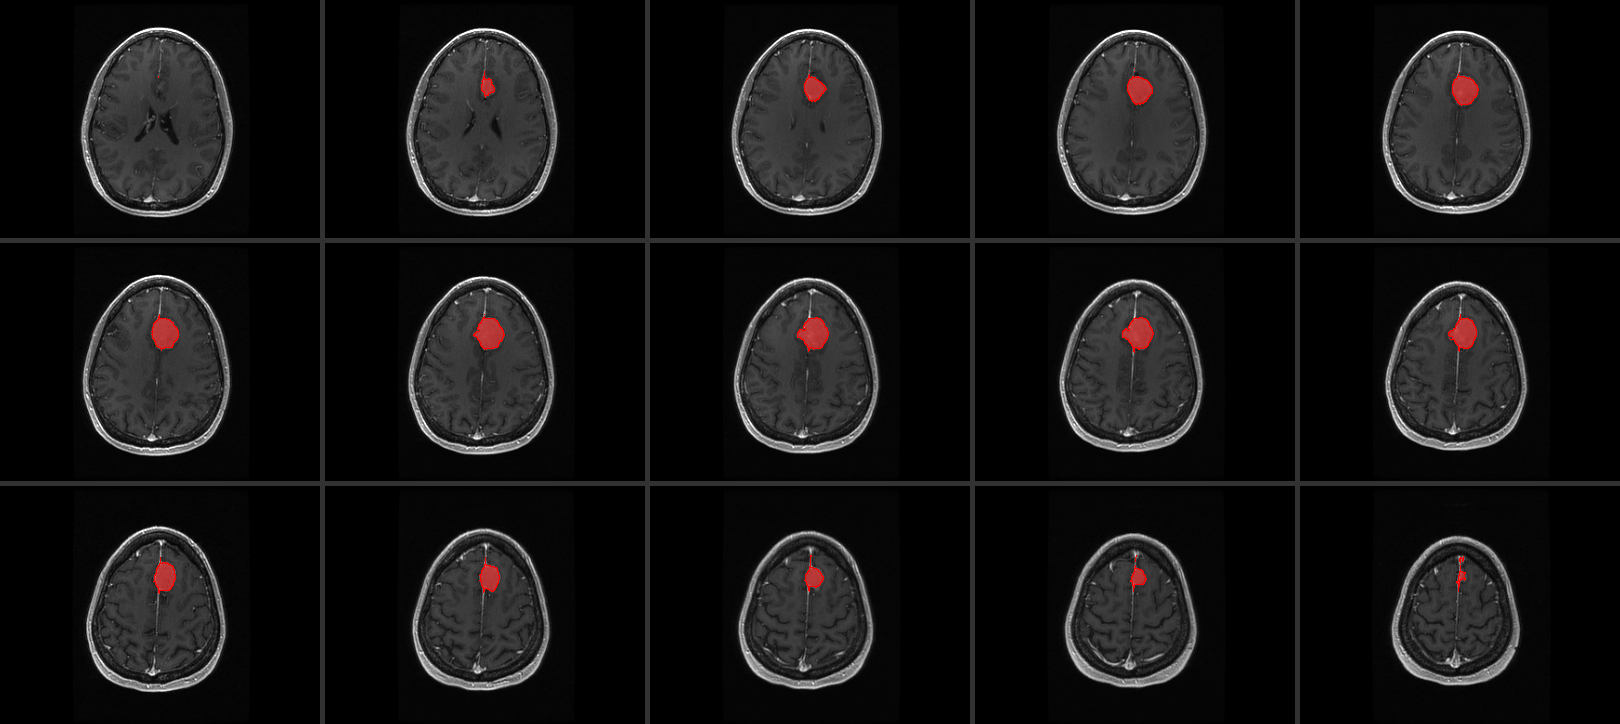

In [50]:
segmentationNode = slicer.vtkMRMLSegmentationNode()
slicer.mrmlScene.AddNode(segmentationNode)
segmentationNode.CreateDefaultDisplayNodes() # only needed for display
segmentationNode.SetReferenceImageGeometryParameterFromVolumeNode(volume)

# Create seed segment inside tumor
tumorSeed = vtk.vtkSphereSource()
tumorSeed.SetCenter(-6, 30, 28)
tumorSeed.SetRadius(10)
tumorSeed.Update()
tumorSegmentId = segmentationNode.AddSegmentFromClosedSurfaceRepresentation(tumorSeed.GetOutput(), "Tumor", [1.0,0.0,0.0])

# Create seed segment outside tumor
backgroundSeedPositions = [[0,65,32], [1, -14, 30], [0, 28, -7], [0,30,64], [31, 33, 27], [-42, 30, 27]]
append = vtk.vtkAppendPolyData()
for backgroundSeedPosition in backgroundSeedPositions:
  backgroundSeed = vtk.vtkSphereSource()
  backgroundSeed.SetCenter(backgroundSeedPosition)
  backgroundSeed.SetRadius(10)
  backgroundSeed.Update()
  append.AddInputData(backgroundSeed.GetOutput())

append.Update()
backgroundSegmentId = segmentationNode.AddSegmentFromClosedSurfaceRepresentation(append.GetOutput(), "Background", [0.0,1.0,0.0])

# Run filter
################################################

# Create segment editor to get access to effects
segmentEditorWidget = slicer.qMRMLSegmentEditorWidget()
# To show segment editor widget (useful for debugging): segmentEditorWidget.show()
segmentEditorWidget.setMRMLScene(slicer.mrmlScene)
segmentEditorNode = slicer.vtkMRMLSegmentEditorNode()
slicer.mrmlScene.AddNode(segmentEditorNode)
segmentEditorWidget.setMRMLSegmentEditorNode(segmentEditorNode)
segmentEditorWidget.setSegmentationNode(segmentationNode)
segmentEditorWidget.setMasterVolumeNode(volume)

# Run segmentation
segmentEditorWidget.setActiveEffectByName("Grow from seeds")
effect = segmentEditorWidget.activeEffect()
# You can change parameters by calling: effect.setParameter("MyParameterName", someValue)
# Most effect don't have onPreview, you can just call onApply
effect.self().onPreview()
effect.self().onApply()

# Clean up and show results
################################################

# Clean up
slicer.mrmlScene.RemoveNode(segmentEditorNode)

# Make segmentation results nicely visible in 3D
segmentationDisplayNode = segmentationNode.GetDisplayNode()
segmentationDisplayNode.SetSegmentVisibility(backgroundSegmentId, False)

# 
segmentCenterRAS = segmentationNode.GetSegmentCenterRAS(tumorSegmentId)
slicernb.ViewLightboxDisplay(rows=3, columns=5, positionRange=[segmentCenterRAS[2]-25, segmentCenterRAS[2]+10])